<center><font color="red">**DO NOT DISTRIBUTE**</font></center>

This exam will assess your ability to use Python for data preparation, visualization, and prediction. At a minimum, you must provide what is ask at each step - but you may include additional analysis if you deem it appropriate. 

**Do not include more than one idea per notebook cell.** Practically, this means that each cell should contain only a single function definition or a single statement. The obvious exception to this is a block of human-readable text to explain what you are doing, or what your output means. Violation of this principle will result in **5%** being deducted from your final grade. Presentation of analysis and results is almost as important as their accuracy. 

# Problem 1 - Regression

Explore the Auto-Mpg Dataset and use your findings to develop a model that will accurately predict the miles-per-gallon of a car based on one or more factors. 

## Import the Necessary Libraries

### 0 points

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import csv
import matplotlib as mp
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso




%matplotlib inline


## Read in the Data

Create a function that will read in the Auto-Mpg dataset using the standard python libraries and store the data in a Pandas `DataFrame` object. 
- The dataset can be found in the webcourse site's "Files" section, under the "Exams" folder. 
- Your function should take the file path to the data set as a parameter and return the `DataFrame` object that it creates. 
- Only store the brand of the car, not the full name (e.g. "chevrolet" instead of "chevrolet chevelle malibu")

An example use of this function would resemble:

`mpg_df = load_dataset("auto-mpg.data")`

You are not to use pandas or numpy to read in the actual file. Your code should use `open()` inside of a context manager. If you use an existing library to open and parse the data file (e.g. pandas, numpy, csv), you will only receive 50% credit for Problem 1.

**HINT -** Recall that a data frame can be created from a list of dictionaries. 

### 5 points

In [3]:

def load_dataset(file):
    test=[]
    data=open(file, 'r')
    for i in data.readlines():
        row=i.strip().split()
        test.append({
                'mpg':float(row[0]),
                'cylinders':int(row[1]),
                'displacement':float(row[2]),
                'horsepower':float(row[3]),
                'weight':float(row[4]),
                'acceleration':float(row[5]),
                'model year':int(row[6]),
                'origin':int(row[7]),
                'car brand':str(row[8][1:]).replace('"','')})
    AutoDF=pd.DataFrame.from_dict(test)
    return AutoDF

mpg_df=load_dataset('auto-mpg.data')


Use your function to read in the the Auto-Mpg dataset and then use the `info()` function to make sure that the structure looks correct. The structure should follow:

<pre>
1. Number of Instances: 398

2. Number of Attributes: 9 including the class attribute

3. Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car brand:      string (unique for each instance)
</pre>

If the data you have read in does not conform the expected structure, fix it. This may include renaming columns and converting the data type of one or more columns.

### 5 points

In [4]:
pd.DataFrame.info(mpg_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
acceleration    398 non-null float64
car brand       398 non-null object
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
model year      398 non-null int64
mpg             398 non-null float64
origin          398 non-null int64
weight          398 non-null float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [5]:
mpg_df['car brand'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac', 'dodge',
       'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi', 'saab', 'bmw',
       'chevy', 'hi', 'mercury', 'opel', 'fiat', 'oldsmobile', 'chrysler',
       'mazda', 'volvo', 'renault', 'toyouta', 'maxda', 'honda', 'subaru',
       'chevroelt', 'capri', 'vw', 'mercedes-benz', 'cadillac', 'mercedes',
       'vokswagen', 'triumph', 'nissan'], dtype=object)

In [6]:
mpg_df['car brand'].replace('chevroelt', 'chevrolet', inplace=True)
mpg_df['car brand'].replace('chevy', 'chevrolet', inplace=True)
mpg_df['car brand'].replace('maxda', 'mazda', inplace=True)
mpg_df['car brand'].replace('mercedes-benz', 'mercedes', inplace=True)
mpg_df['car brand'].replace('toyouta', 'toyota', inplace=True)
mpg_df['car brand'].replace('vokswagen', 'volkswagen', inplace=True)
mpg_df['car brand'].replace('vw', 'volkswagen', inplace=True)

In [7]:
mpg_df['car brand'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac', 'dodge',
       'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi', 'saab', 'bmw',
       'hi', 'mercury', 'opel', 'fiat', 'oldsmobile', 'chrysler', 'mazda',
       'volvo', 'renault', 'honda', 'subaru', 'capri', 'mercedes',
       'cadillac', 'triumph', 'nissan'], dtype=object)

## Clean the Data (5 points)

Now that you have stored your data in a `DataFrame` object and corrected its structure, you will examine the data to check for:

- missing data
- outliers
- anomalies

If any of these data problems occur, print out the rows with the problem before you modify the data frame. Use your best judgement when it comes to resolving these issues.

**HINT** - Sometimes it is easier to visualize the data to get an idea of problem entries.

In [8]:

outlier_data = mpg_df[np.abs(mpg_df['horsepower']-np.mean(mpg_df)['horsepower'])> 3 * np.std(mpg_df)['horsepower']] 


anomalies_data = mpg_df[np.abs(mpg_df['displacement']-np.mean(mpg_df)['displacement'])> 5 * np.std(mpg_df)['horsepower']] 
no_data = mpg_df[mpg_df.isnull().any(axis=1)]

print("outlier:")
print(outlier_data)
print("anomalies:")
print(anomalies_data)
print("no_data:")
print(no_data)

outlier:
     acceleration  car brand  cylinders  displacement  horsepower  model year  \
6             9.0  chevrolet          8         454.0       220.0          70   
8            10.0    pontiac          8         455.0       225.0          70   
13           10.0      buick          8         455.0       225.0          70   
95           11.0      buick          8         455.0       225.0          73   
116           9.5    pontiac          8         400.0       230.0          73   

      mpg  origin  weight  
6    14.0       1  4354.0  
8    14.0       1  4425.0  
13   14.0       1  3086.0  
95   12.0       1  4951.0  
116  16.0       1  4278.0  
anomalies:
     acceleration  car brand  cylinders  displacement  horsepower  model year  \
5            10.0       ford          8         429.0       198.0          70   
6             9.0  chevrolet          8         454.0       220.0          70   
7             8.5   plymouth          8         440.0       215.0          70   
8

In [9]:
mpg_df['horsepower'].fillna(mpg_df['horsepower'].mean(), inplace=True)
mpg_df['acceleration'].fillna(mpg_df['acceleration'].mean(), inplace=True)

In [10]:
no_data = mpg_df_mod[mpg_df.isnull().any(axis=1)]
print(no_data)

NameError: name 'mpg_df_mod' is not defined

## Explore the Data

Now that you have cleaned the data, you will explore it and try to identify the features that may be important in predicting `mpg` data.

#### Create a histogram for each variable in the dataset (8 points)

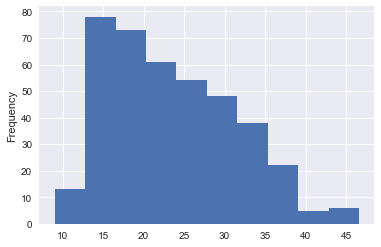

In [11]:
mpg_df['mpg'].plot.hist()

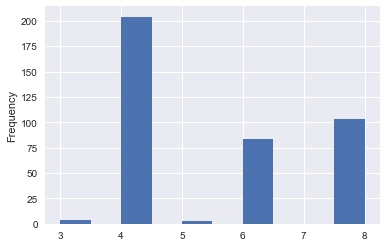

In [12]:
mpg_df['cylinders'].plot.hist()

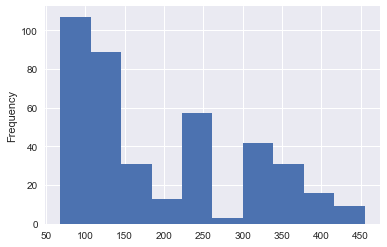

In [13]:
mpg_df['displacement'].plot.hist()

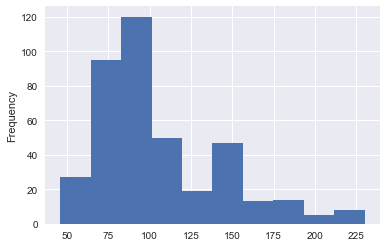

In [14]:
mpg_df['horsepower'].plot.hist()

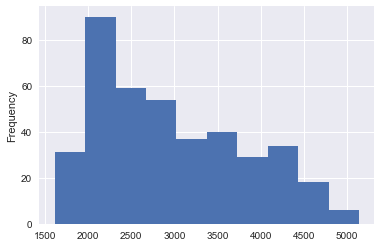

In [15]:
mpg_df['weight'].plot.hist()

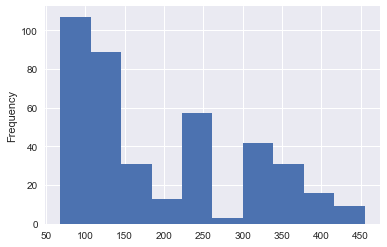

In [16]:
mpg_df['displacement'].plot.hist()

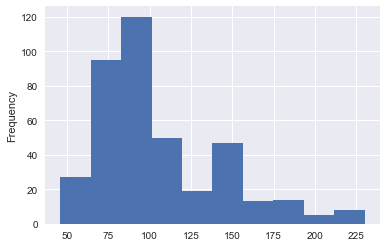

In [17]:
mpg_df['horsepower'].plot.hist()

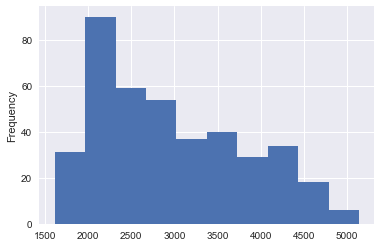

In [18]:
mpg_df['weight'].plot.hist()

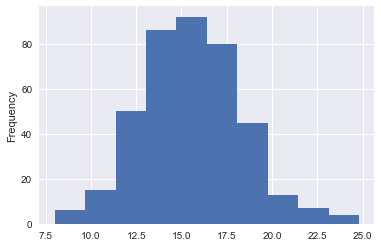

In [19]:
mpg_df['acceleration'].plot.hist()

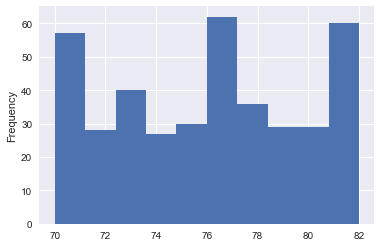

In [20]:
mpg_df['model year'].plot.hist()

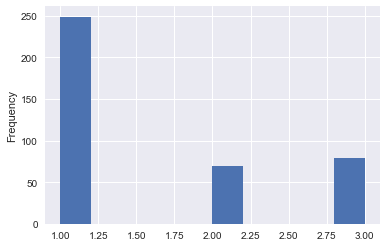

In [21]:
mpg_df['origin'].plot.hist()

#### Create scatter plots of mpg vs. every other variable in the dataset. (e.g. weight vs. mpg, origin vs. mpg). Color your data based on the brand of the car (7 points)

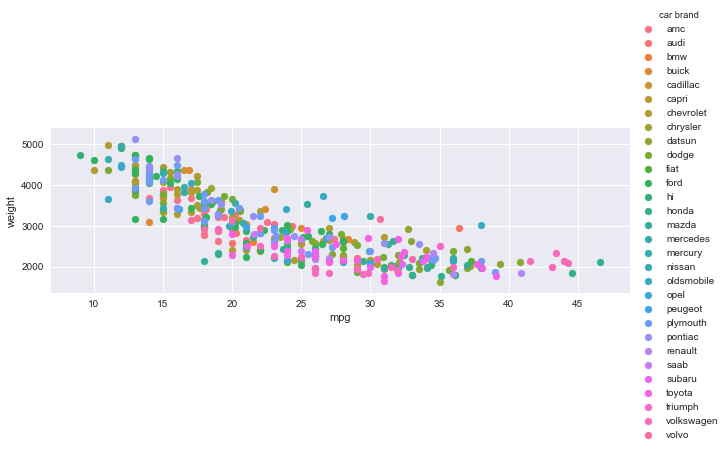

In [22]:
fg = sns.FacetGrid(data=mpg_df.sort_values(by = 'car brand'), hue='car brand', aspect=3)
fg.map(mp.pyplot.scatter, 'mpg', 'weight').add_legend()

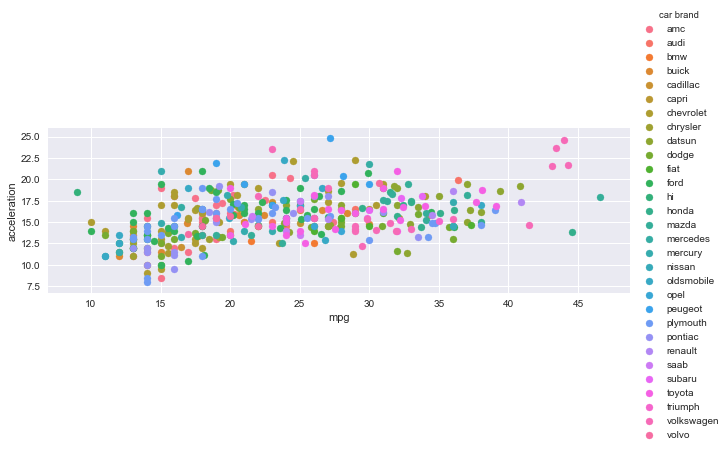

In [23]:
fg = sns.FacetGrid(data=mpg_df.sort_values(by = 'car brand'), hue='car brand', aspect=3)
fg.map(mp.pyplot.scatter, 'mpg', 'acceleration').add_legend()

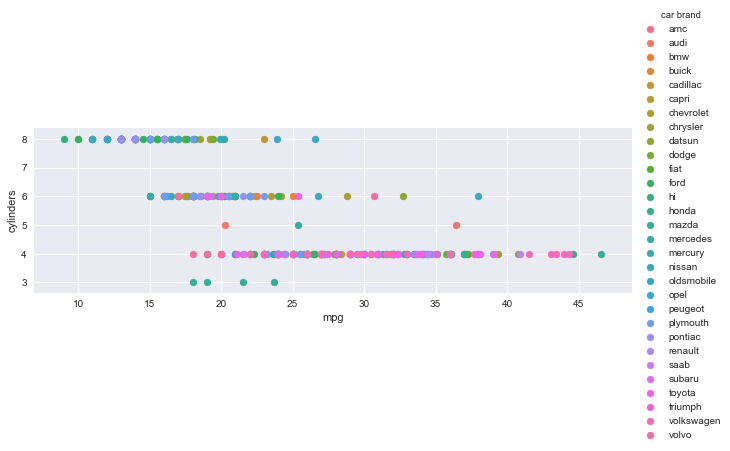

In [24]:
fg = sns.FacetGrid(data=mpg_df.sort_values(by = 'car brand'), hue='car brand', aspect=3)
fg.map(mp.pyplot.scatter, 'mpg', 'cylinders').add_legend()

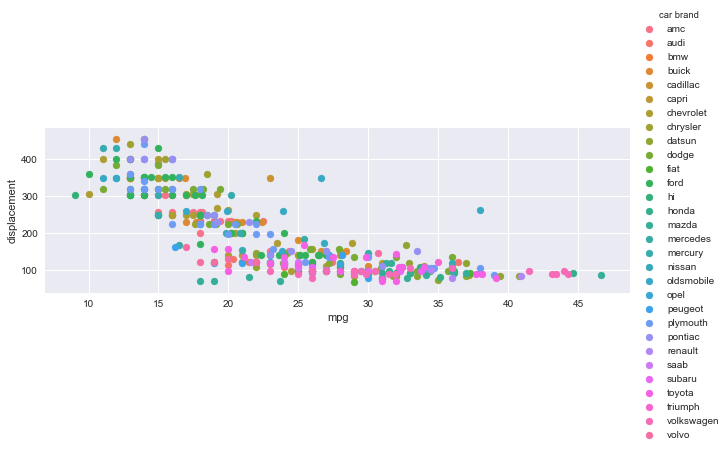

In [25]:
fg = sns.FacetGrid(data=mpg_df.sort_values(by = 'car brand'), hue='car brand', aspect=3)
fg.map(mp.pyplot.scatter, 'mpg', 'displacement').add_legend()

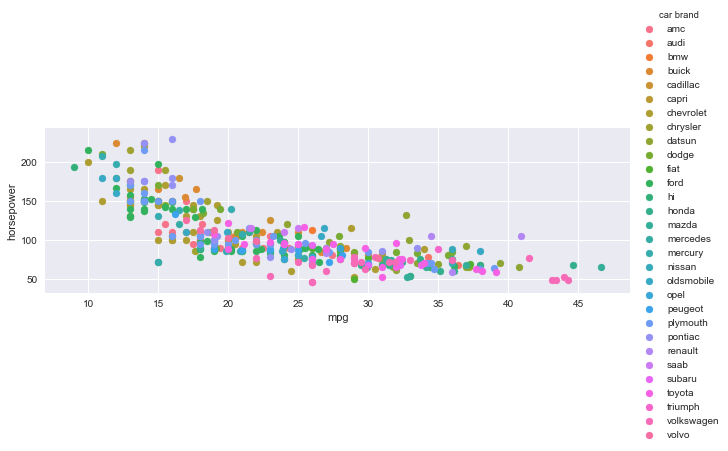

In [26]:
fg = sns.FacetGrid(data=mpg_df.sort_values(by = 'car brand'), hue='car brand', aspect=3)
fg.map(mp.pyplot.scatter, 'mpg', 'horsepower').add_legend()

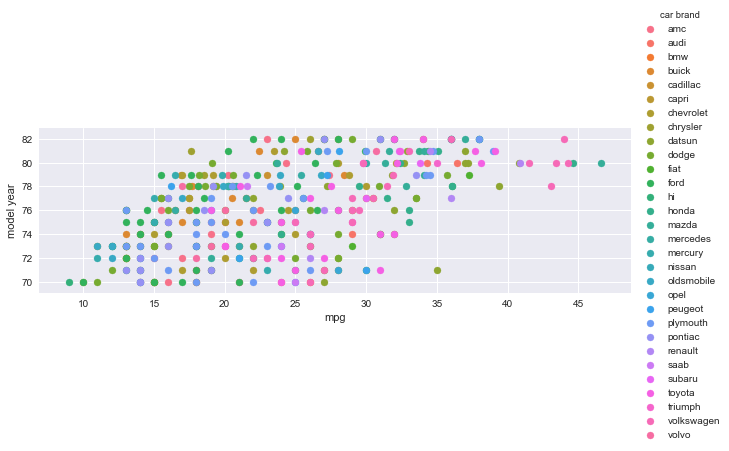

In [27]:
fg = sns.FacetGrid(data=mpg_df.sort_values(by = 'car brand'), hue='car brand', aspect=3)
fg.map(mp.pyplot.scatter, 'mpg', 'model year').add_legend()

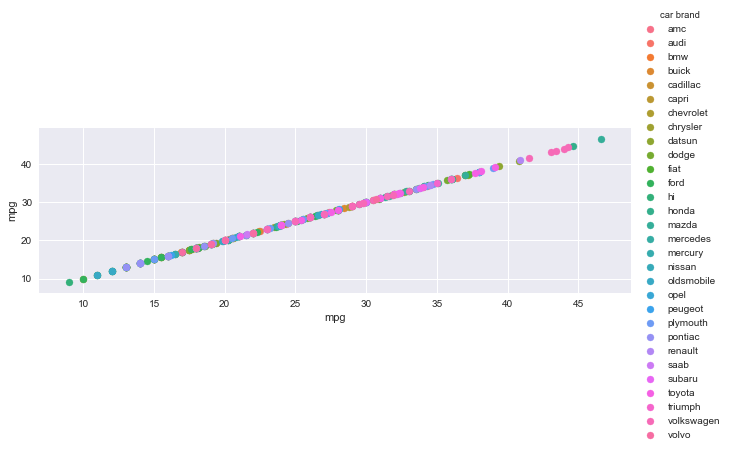

In [28]:
fg = sns.FacetGrid(data=mpg_df.sort_values(by = 'car brand'), hue='car brand', aspect=3)
fg.map(mp.pyplot.scatter, 'mpg', 'mpg').add_legend()

In [1]:
fg = sns.FacetGrid(data=mpg_df.sort_values(by = 'car brand'), hue='car brand', aspect=3)
fg.map(mp.pyplot.scatter, 'mpg', 'origin').add_legend()

NameError: name 'sns' is not defined

#### Calculate the pearson correlation between `mpg` and the other variables. (1 point)

In [30]:
mpg_df.corr(method='pearson')['mpg']

acceleration    0.420289
cylinders      -0.775396
displacement   -0.804203
horsepower     -0.771437
model year      0.579267
mpg             1.000000
origin          0.563450
weight         -0.831741
Name: mpg, dtype: float64

#### Which variables appear to be correlated to `mpg`? (1 point)

weight, displacement, cylinders and horsepower have the highest correlation to mpg.

#### Is there multicollinearity within the data? (1 point)

Yes, for example cylinders and horsepower; Weight and displacement

## Build a Predictive Model of MPG

#### Divide your data into a training set and a test set. Use 30% of the data for your test set (1 point)

**WARNING** - The following substeps may take substantial computational time, depending on your computer hardware. If you lack the computing power to use GridSearchCV, you may use RandomizedSearchCV instead.

### Lasso Regression (6 points)

Using the training data:
- Build a pipeline that fits scaled data to a polynomial LASSO regression model
  - Use GridSearchCV to identify the best hyperparameters
    - It is up to you to select sufficient and appropriate ranges for PolynomialFeatures.degree and Lasso.alpha
  - Display the best parameters
  - Display the score

**HINT** You will need to make a pipeline from a StandardScaler(), PolynomialFeatures(), and Lasso() object.

### Ridge Regression (6 points)

Using the training data:
- Build a pipeline that fits scaled data to a polynomial Ridge regression model
  - Use GridSearchCV to identify the best hyperparameters
    - It is up to you to select sufficient and appropriate ranges PolynomialFeatures.degree and Ridge.alpha
  - Display the best parameters
  - Display the score

**HINT** You will need to make a pipeline from a StandardScaler(), PolynomialFeatures(), and Ridge() object.

### Lasso Regression with PCA (6 points)

Using the training data:
- Build a pipeline that performs PCA on scaled data and then fits the results to a polynomial Lasso regression model
  - Use GridSearchCV to identify the best hyperparameters
    - It is up to you to select sufficient and appropriate ranges for PCA.n_components, PolynomialFeatures.degree, and Lasso.alpha
  - Display the best parameters
  - Display the score

**HINT -** You will need to make a pipeline from a StandardScaler(), PCA(), PolynomialFeatures(), and Lasso() object.

**HINT -** You may need to construct Lasso with `max_iter=10000` if your alpha values are small and you get convergence warnings.

### Ridge Regression with PCA (6 points)

Using the training data:
- Build a pipeline that performs PCA on scaled data and then fits the results to a polynomial Ridge regression model
  - Use GridSearchCV to identify the best hyperparameters
    - It is up to you to select sufficient and appropriate ranges for PCA.n_components, PolynomialFeatures.degree, and Ridge.alpha
  - Display the best parameters
  - Display the score

**HINT -** You will need to make a pipeline from a StandardScaler(), PCA(), PolynomialFeatures(), and Ridge() object.

#### Compare the score of each model and identify which model does best on the training data (1 point)

All four models are close, but it looks like transforming the data with PCA and removing some components may do better on the training set. 

### Validate the Model (1 point)

Using your test data constructed in Step 4, validate your models and identify which one has the highest score for predicting `mpg`.

## Draw Your Conclusions (5 points)

Which model does best, and why do you think that is the case? Are there alternative models that might do better?

# Problem 2 (3 point)

Compare and contrast SAS and Python for use in Data Analysis

The SAS class we had in this program had more concept than programming in which the professor gave us sample codes to run and used the same code for homework. In contrary, this class is more on programming than any another class. To my personal expereience, the SAS is moree statistical than Python.

# Problem 3 (1 point)

What did you like most about this course?

The professor and his patience in teaching our beginners the basics of python.

# Problem 4 (1 point)

What did you like least about this course?

The level of difficulty is above and my beyond my background but I hope I will finally master the skill in python.

# Problem 5 - Classification (Bonus Problem - 20%)

*This problem is not required, but you can earn 4% extra on this exam for reading in and cleaning the data, and then 4% extra for each classifier that you implement (for a total of 20% extra to your grade - 14 points).*  

Download the iris dataset from the Exam folder within the webcourse Files section and then analyze the iris dataset and build the following classifiers:
- SVC
- NearestNeighbors
- KMeans
- RandomForestClassifier

For each classifier, fit it to a training set, show how well it does on that training set, and then score it on a test set. Use data transformers and GridSearchCV as necessary.

The general structure of your solution should follow Problem 1. Credit will be assigned all or nothing on a per-classifier basis - there is no partial credit for this problem.

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# load and split the data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

# compute minimum and maximum on the training data
scaler = MinMaxScaler().fit(X_train)